In [61]:
# importing the necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import pickle

In [48]:
#import the dataset
data = pd.read_csv('spam_ham_dataset.csv')

In [49]:
#see the top 5 entries in dataframe
data.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


<AxesSubplot:>

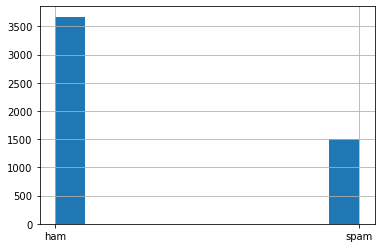

In [50]:
# plotting number of spam and ham labels as histogram
data['label'].hist()

In [51]:
# checking for na values
data.isna().sum()

label        0
text         0
label_num    0
dtype: int64

In [53]:
# checking for empty text in dataset
index = []
for i in range(0,len(data)):
    if data['text'][i].isspace():
        index.append(i)
print(index)
print(f'length is :{len(index)}')

[]
length is :0


In [54]:
X = data['text'] # features(raw text)
y = data['label'] # labels
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [55]:
clf_model = Pipeline([('feature_extraction',TfidfVectorizer()),('SVC',SVC())])

In [56]:
# training the model
clf_model.fit(X_train,y_train)

Pipeline(steps=[('feature_extraction', TfidfVectorizer()), ('SVC', SVC())])

In [58]:
predictions = clf_model.predict(X_test)

In [60]:
print(accuracy_score(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

0.984182776801406


[[1224   22]
 [   5  456]]


              precision    recall  f1-score   support

         ham       1.00      0.98      0.99      1246
        spam       0.95      0.99      0.97       461

    accuracy                           0.98      1707
   macro avg       0.97      0.99      0.98      1707
weighted avg       0.98      0.98      0.98      1707



In [ ]:
with open('filename.pkl', 'wb') as f:
    pickle.dump(clf, f)